In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from geopandas import sjoin
from shapely.geometry import Point

Setting up the Coordinate Reference Systems up front in the necessary format.

In [2]:
# Globals
crs_degree = {'init': 'epsg:4326'} # CGS_WGS_1984 (what the GPS uses)

# Attention: export the geo data (lat/lng and shapefiles) with the same Coordinate Reference System!
### Currently for this IPython (and maybe in future), we are going with `CGS_WGS_1984`.

### How to export:

- In ArcGIS -> Analysis -> Tools: 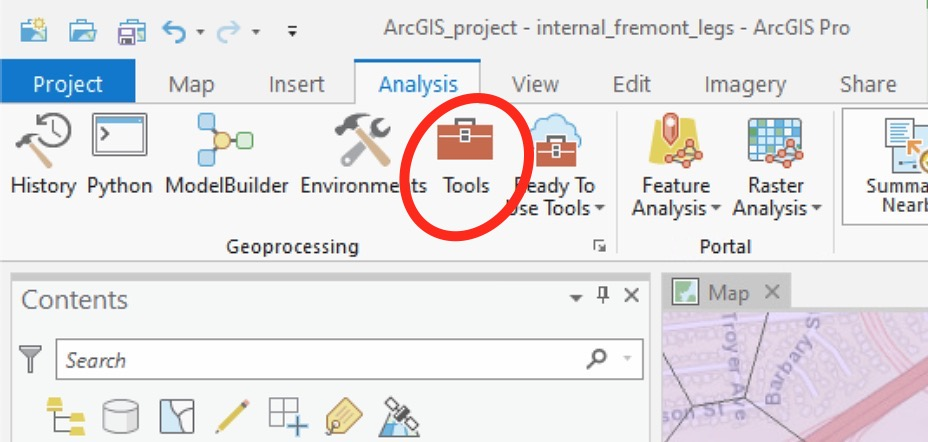

- On the right side, pick the data and click on folder icon: 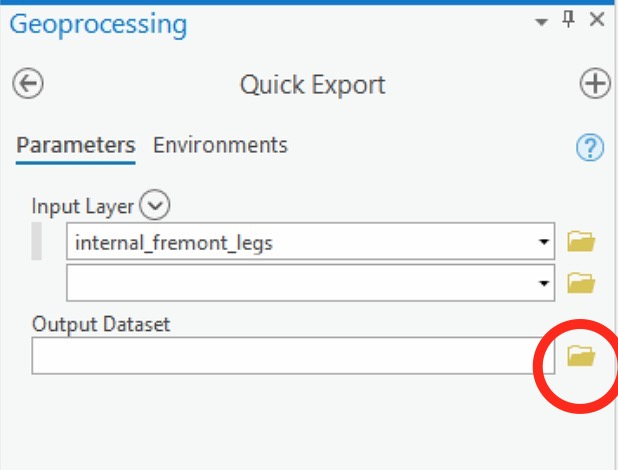

- Pick `CGS_WGS_1984` Coord. system: 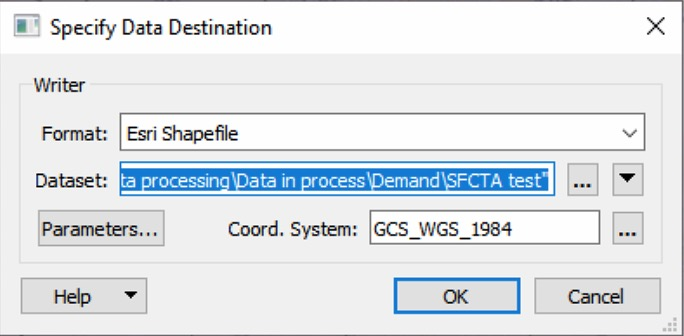


In [3]:
# Paths
data_collection = "/Users/michaltakac/Dropbox/Data Collection"
data_in_process = data_collection + "/Data Processing/Data in process"

arcgis_project = "/Users/michaltakac/Dropbox/Data Collection/ArcGIS"
int_centroid_zones = data_in_process + "/Demand/SFCTA test/InternalCentroidZones.shp"
ext_centroid_zones = arcgis_project + "/Demand/TAZ/ExternalCentroidZones.shp"

end_legs = "/Users/michaltakac/Dropbox/Data Collection/Raw data/SFCTA demand data/ending_fremont_legs.csv"

In [4]:
# Load internal centroid zones from shapefile
icz = GeoDataFrame.from_file(int_centroid_zones)
icz.head()

,FID,OBJECTID,Shape_Leng,Shape_Area,CentroidID,geometry
0,0,2,3732.741316,8.192720e+05,21,"POLYGON Z ((-121.92829 37.49921 0.00000, -121...."
1,1,3,9042.119570,4.329841e+06,26,"POLYGON Z ((-121.95631 37.49854 0.00000, -121...."
2,2,4,6766.028824,2.260875e+06,1,"POLYGON Z ((-121.95809 37.50038 0.00000, -121...."
3,3,5,2672.089121,4.399604e+05,29,"POLYGON Z ((-121.94043 37.50354 0.00000, -121...."
4,4,6,6126.178508,1.361209e+06,25,"POLYGON Z ((-121.93679 37.49704 0.00000, -121...."


In [5]:
# Load external centroid zones from shapefile
ecz = GeoDataFrame.from_file(ext_centroid_zones)
ecz.head()

,FID,OBJECTID,Shape_Leng,Shape_Area,CentroidID,geometry
0,0,2,437509.321572,1.254273e+10,13,"POLYGON Z ((-121.93337 37.55565 0.00000, -121...."
1,1,4,66950.443866,2.025401e+08,12,"POLYGON Z ((-121.93055 37.55450 0.00000, -121...."
2,2,6,23060.329581,1.231698e+07,6,"POLYGON Z ((-122.02058 37.57545 0.00000, -122...."
3,3,7,21534.252771,8.302704e+06,5,"POLYGON Z ((-121.95718 37.53627 0.00000, -121...."
4,4,8,11351.867430,6.862430e+06,19,"POLYGON Z ((-121.91025 37.48623 0.00000, -121...."


In [6]:
end_data = pd.read_csv(end_legs)
end_data.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng
0,87531621,2000-01-02 02:18:00 +0800,37.59346,-122.38437,37.51941,-121.95007
1,87574224,2000-01-01 22:02:00 +0800,37.38812,-121.97604,37.53183,-121.92245
2,87585765,2000-01-01 16:32:00 +0800,37.60484,-122.38779,37.50937,-121.94962
3,87585770,2000-01-01 22:19:00 +0800,37.50821,-121.96212,37.50937,-121.94962
4,87581078,2000-01-02 07:05:00 +0800,37.44256,-121.88313,37.50937,-121.94962


In [7]:
# Process XY coordinates data as Point geometry for start nodes
ext_int_start_nodes = [Point(xy) for xy in zip(end_data.start_node_lng, end_data.start_node_lat)]

In [8]:
# Process XY coordinates data as Point geometry for end nodes
ext_int_end_nodes = [Point(xy) for xy in zip(end_data.end_node_lng, end_data.end_node_lat)]

In [9]:
# Create GeoDataFrame from start points
ext_int_start_points = GeoDataFrame(pd.read_csv(end_legs), crs=crs_degree, geometry=ext_int_start_nodes)
# just checking how the GeoDataFrame looks...
ext_int_start_points.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry
0,87531621,2000-01-02 02:18:00 +0800,37.59346,-122.38437,37.51941,-121.95007,POINT (-122.38437 37.59346)
1,87574224,2000-01-01 22:02:00 +0800,37.38812,-121.97604,37.53183,-121.92245,POINT (-121.97604 37.38812)
2,87585765,2000-01-01 16:32:00 +0800,37.60484,-122.38779,37.50937,-121.94962,POINT (-122.38779 37.60484)
3,87585770,2000-01-01 22:19:00 +0800,37.50821,-121.96212,37.50937,-121.94962,POINT (-121.96212 37.50821)
4,87581078,2000-01-02 07:05:00 +0800,37.44256,-121.88313,37.50937,-121.94962,POINT (-121.88313 37.44256)


In [10]:
# Create GeoDataFrame from end points
ext_int_end_points = GeoDataFrame(pd.read_csv(end_legs), crs=crs_degree, geometry=ext_int_end_nodes)
# just checking how the GeoDataFrame looks...
ext_int_end_points.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry
0,87531621,2000-01-02 02:18:00 +0800,37.59346,-122.38437,37.51941,-121.95007,POINT (-121.95007 37.51941)
1,87574224,2000-01-01 22:02:00 +0800,37.38812,-121.97604,37.53183,-121.92245,POINT (-121.92245 37.53183)
2,87585765,2000-01-01 16:32:00 +0800,37.60484,-122.38779,37.50937,-121.94962,POINT (-121.94962 37.50937)
3,87585770,2000-01-01 22:19:00 +0800,37.50821,-121.96212,37.50937,-121.94962,POINT (-121.94962 37.50937)
4,87581078,2000-01-02 07:05:00 +0800,37.44256,-121.88313,37.50937,-121.94962,POINT (-121.94962 37.50937)


...okay, so we have geometry as `shapely.Point`s

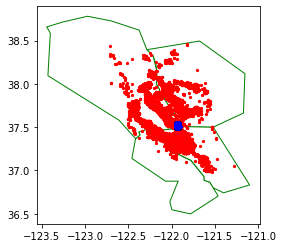

In [11]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
#ax.set_aspect('equal')

icz.plot(ax=ax, color='white', edgecolor='black')
ecz.plot(ax=ax, color='white', edgecolor='green')
ext_int_start_points.plot(ax=ax, marker='o', color='red', markersize=5)
ext_int_end_points.plot(ax=ax, marker='o', color='blue', markersize=5)

plt.rcParams["figure.figsize"] = [15,15]
plt.show();

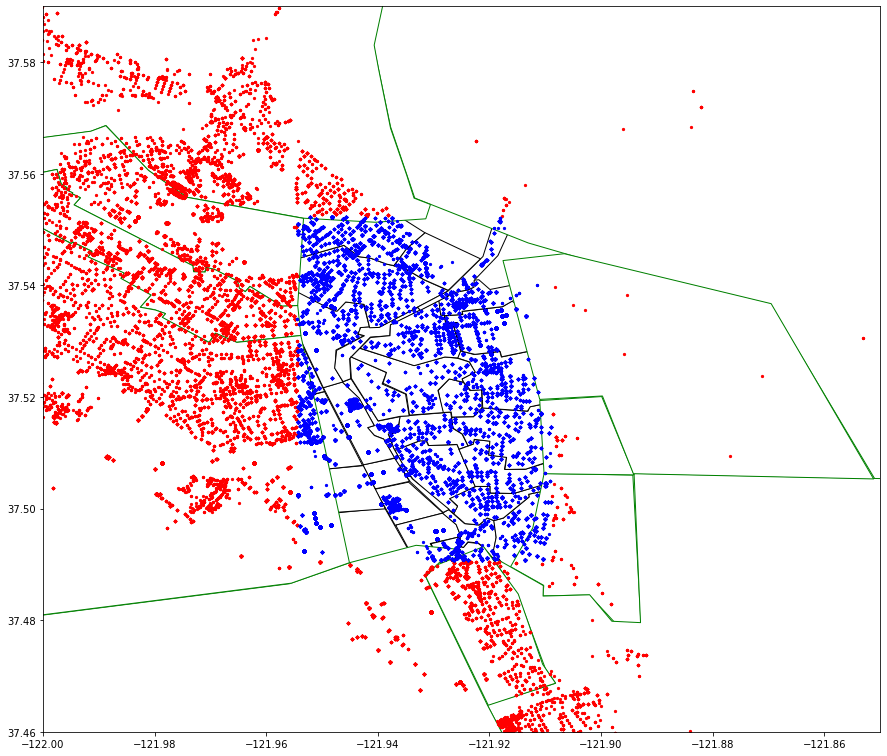

In [12]:
# Zoom-in a bit...
fig, ax = plt.subplots()

icz.plot(ax=ax, color='white', edgecolor='black')
ecz.plot(ax=ax, color='white', edgecolor='green')
ext_int_start_points.plot(ax=ax, marker='o', color='red', markersize=5)
ext_int_end_points.plot(ax=ax, marker='o', color='blue', markersize=5)

plt.rcParams["figure.figsize"] = [15,15]
plt.axis([-122,-121.85,37.46,37.59])
plt.show();

red color = start nodes, blue color = end nodes, black lines = internal centroid zones, green lines = external centroid zones

In [26]:
# Spatial join (start nodes)
# docs: http://geopandas.org/mergingdata.html
ext_int_start_nodes_OD = gpd.sjoin(ext_int_start_points, ecz, how='left', op='within')
# Some columns had stange names...
ext_int_start_nodes_OD.rename(
    columns={
        "start_node": "start_node_lat",
        "start_no00": "start_node_lng",
        "end_node_l": "end_node_lat",
        "end_node00": "end_node_lng",
        "CentroidID": "CentroidID_O"
    },
    inplace=True
)
for column in ['index_left', 'index_right', 'OBJECTID']:
    try:
        ext_int_start_nodes_OD.drop(column, axis=1, inplace=True)
    except KeyError:
        # ignore if there are no index columns
        pass
    
ext_int_start_nodes_OD.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry,FID,Shape_Leng,Shape_Area,CentroidID_O
0,87531621,2000-01-02 02:18:00 +0800,37.59346,-122.38437,37.51941,-121.95007,POINT (-122.38437 37.59346),7,628478.423004,1.986019e+10,4
1,87574224,2000-01-01 22:02:00 +0800,37.38812,-121.97604,37.53183,-121.92245,POINT (-121.97604 37.38812),6,437445.770541,7.244543e+09,21
2,87585765,2000-01-01 16:32:00 +0800,37.60484,-122.38779,37.50937,-121.94962,POINT (-122.38779 37.60484),7,628478.423004,1.986019e+10,4
3,87585770,2000-01-01 22:19:00 +0800,37.50821,-121.96212,37.50937,-121.94962,POINT (-121.96212 37.50821),7,628478.423004,1.986019e+10,4
4,87581078,2000-01-02 07:05:00 +0800,37.44256,-121.88313,37.50937,-121.94962,POINT (-121.88313 37.44256),5,330568.646352,5.429565e+09,20


In [27]:
# Spatial join (end nodes)
# docs: http://geopandas.org/mergingdata.html
ext_int_end_nodes_OD = gpd.sjoin(ext_int_end_points, icz, how='left', op='within')
ext_int_end_nodes_OD.rename(
    columns={
        "CentroidID": "CentroidID_D"
    },
    inplace=True
)

for column in ['index_left', 'index_right', 'OBJECTID']:
    try:
        ext_int_end_nodes_OD.drop(column, axis=1, inplace=True)
    except KeyError:
        # ignore if there are no index columns
        pass
    
ext_int_end_nodes_OD.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry,FID,Shape_Leng,Shape_Area,CentroidID_D
0,87531621,2000-01-02 02:18:00 +0800,37.59346,-122.38437,37.51941,-121.95007,POINT (-121.95007 37.51941),16,6270.634124,2.379123e+06,2
1,87574224,2000-01-01 22:02:00 +0800,37.38812,-121.97604,37.53183,-121.92245,POINT (-121.92245 37.53183),24,6201.874013,1.935944e+06,8
2,87585765,2000-01-01 16:32:00 +0800,37.60484,-122.38779,37.50937,-121.94962,POINT (-121.94962 37.50937),16,6270.634124,2.379123e+06,2
3,87585770,2000-01-01 22:19:00 +0800,37.50821,-121.96212,37.50937,-121.94962,POINT (-121.94962 37.50937),16,6270.634124,2.379123e+06,2
4,87581078,2000-01-02 07:05:00 +0800,37.44256,-121.88313,37.50937,-121.94962,POINT (-121.94962 37.50937),16,6270.634124,2.379123e+06,2


In [28]:
ext_int_start_nodes_OD.loc[[56705, 56706, 56707, 56708, 56709, 56710]]

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry,FID,Shape_Leng,Shape_Area,CentroidID_O
56705,95904844,2000-01-02 03:45:00 +0800,37.38687,-121.97644,37.53726,-121.93962,POINT (-121.97644 37.38687),6,437445.770541,7.244543e+09,21
56706,95904868,2000-01-01 20:45:00 +0800,37.38896,-121.96874,37.53726,-121.93962,POINT (-121.96874 37.38896),6,437445.770541,7.244543e+09,21
56707,95905151,2000-01-02 03:37:00 +0800,37.43092,-121.91579,37.53726,-121.93962,POINT (-121.91579 37.43092),6,437445.770541,7.244543e+09,21
56708,95905153,2000-01-02 04:39:00 +0800,37.36255,-121.87592,37.53726,-121.93962,POINT (-121.87592 37.36255),5,330568.646352,5.429565e+09,20
56709,95905159,2000-01-01 23:08:00 +0800,37.41476,-122.02735,37.53733,-121.94869,POINT (-122.02735 37.41476),6,437445.770541,7.244543e+09,21
56710,95905161,2000-01-02 01:14:00 +0800,37.52704,-121.96669,37.53733,-121.94869,POINT (-121.96669 37.52704),7,628478.423004,1.986019e+10,4


In [29]:
ext_int_end_nodes_OD.loc[[56705, 56706, 56707, 56708, 56709, 56710]]

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry,FID,Shape_Leng,Shape_Area,CentroidID_D
56705,95904844,2000-01-02 03:45:00 +0800,37.38687,-121.97644,37.53726,-121.93962,POINT (-121.93962 37.53726),26,8428.503804,3.456539e+06,6
56706,95904868,2000-01-01 20:45:00 +0800,37.38896,-121.96874,37.53726,-121.93962,POINT (-121.93962 37.53726),26,8428.503804,3.456539e+06,6
56707,95905151,2000-01-02 03:37:00 +0800,37.43092,-121.91579,37.53726,-121.93962,POINT (-121.93962 37.53726),26,8428.503804,3.456539e+06,6
56708,95905153,2000-01-02 04:39:00 +0800,37.36255,-121.87592,37.53726,-121.93962,POINT (-121.93962 37.53726),26,8428.503804,3.456539e+06,6
56709,95905159,2000-01-01 23:08:00 +0800,37.41476,-122.02735,37.53733,-121.94869,POINT (-121.94869 37.53733),26,8428.503804,3.456539e+06,6
56710,95905161,2000-01-02 01:14:00 +0800,37.52704,-121.96669,37.53733,-121.94869,POINT (-121.94869 37.53733),26,8428.503804,3.456539e+06,6


In [30]:
ext_int_OD = ext_int_start_nodes_OD.combine_first(ext_int_end_nodes_OD)
# Make it look like it was generated from ArcGIS (has OBJECTID index starting from 1)
ext_int_OD['OBJECTID'] = ext_int_OD.index + 1
ext_int_OD.head()

,CentroidID_D,CentroidID_O,FID,Shape_Area,Shape_Leng,end_node_lat,end_node_lng,geometry,leg_id,start_node_lat,start_node_lng,start_time,OBJECTID
0,2,4,7,1.986019e+10,628478.423004,37.51941,-121.95007,POINT (-122.38437 37.59346),87531621,37.59346,-122.38437,2000-01-02 02:18:00 +0800,1
1,8,21,6,7.244543e+09,437445.770541,37.53183,-121.92245,POINT (-121.97604 37.38812),87574224,37.38812,-121.97604,2000-01-01 22:02:00 +0800,2
2,2,4,7,1.986019e+10,628478.423004,37.50937,-121.94962,POINT (-122.38779 37.60484),87585765,37.60484,-122.38779,2000-01-01 16:32:00 +0800,3
3,2,4,7,1.986019e+10,628478.423004,37.50937,-121.94962,POINT (-121.96212 37.50821),87585770,37.50821,-121.96212,2000-01-01 22:19:00 +0800,4
4,2,20,5,5.429565e+09,330568.646352,37.50937,-121.94962,POINT (-121.88313 37.44256),87581078,37.44256,-121.88313,2000-01-02 07:05:00 +0800,5


In [31]:
pd.DataFrame.to_csv(ext_int_OD,
    "ext_int_OD.csv",
    encoding='utf8',
    index=False,
    columns=["OBJECTID", "leg_id","start_time","start_node_lat","start_node_lng","end_node_lat","end_node_lng","CentroidID_O","CentroidID_D"]
)

### Check if dataset generated with python matches the one from ArcGIS

In [39]:
ext_int_OD_from_arcgis = pd.read_csv(data_collection + "/Demand Data/OD matrix/ext_int_OD.csv")
# Some ControidID_O or ControidID_O data might not be formatted as numbers
ext_int_OD_from_arcgis[["CentroidID_O", "CentroidID_D"]] = ext_int_OD_from_arcgis[["CentroidID_O", "CentroidID_D"]].apply(pd.to_numeric)

In [40]:
ext_int_OD_generated_with_py = pd.read_csv("ext_int_OD.csv")
# Some ControidID_O or ControidID_O data might not be formatted as numbers
ext_int_OD_generated_with_py[["CentroidID_O", "CentroidID_D"]] = ext_int_OD_generated_with_py[["CentroidID_O", "CentroidID_D"]].apply(pd.to_numeric)

In [41]:
# Test
from pandas._testing import assert_frame_equal

# There was problem at ObjectID 56708 (leg_id 95894923) - the destination centroid ID was 4 AND 12

columns_to_test = ["OBJECTID", "leg_id","start_time","start_node_lat","start_node_lng","end_node_lat","end_node_lng","CentroidID_O","CentroidID_D"]

print('Shape of tested data:', ext_int_OD_generated_with_py[columns_to_test].shape)
print('Shape of ref data:', ext_int_OD_from_arcgis[columns_to_test].shape)

try:
    assert_frame_equal(ext_int_OD_from_arcgis[columns_to_test], ext_int_OD_generated_with_py[columns_to_test])
    print("Success! Generated OD from Python (without arcpy) is the same as the one generated with arcpy.")
except AssertionError:
    print("Error! Generated OD from Python (without arcpy) is different than the one generated with arcpy!")

Shape of tested data: (79995, 9)
Shape of ref data: (79995, 9)
Success! Generated OD from Python (without arcpy) is the same as the one generated with arcpy.


OD clustering

In [42]:
from dateutil import tz
from datetime import datetime, timedelta
import pytz
from pytz import timezone

local_tz = timezone('US/Pacific')

def cluster_col_15min(df, outputname):
    df['dt'] = pd.to_datetime(df['start_time'])
    dt_15=[]
    for dt in df['dt']:
        #local_dt = dt.replace(tzinfo=pytz.utc).astimezone(local_tz)
        dt_15.append(dt.replace(minute=int(dt.minute/15)*15,second = 0).replace(tzinfo=pytz.utc).astimezone(local_tz))

    df['dt_15'] = dt_15
    start_end = pd.pivot_table(df, index=['CentroidID_O','CentroidID_D'], columns = ['dt_15'], values=['OBJECTID'],
                         aggfunc={'OBJECTID':'count'}, fill_value = 0).rename(columns={'OBJECTID':'count'})
    start_end.to_csv(outputname)
    return start_end

In [43]:
cluster_col_15min(ext_int_OD_generated_with_py, 'ext_int_OD_col_15.csv')
cluster_OD_15min_ext_int = pd.read_csv('ext_int_OD_col_15.csv')

In [44]:
cluster_OD_15min_ext_int_ref = pd.read_csv(data_collection + "/Demand Data/OD matrix/ext_int_OD_col_15.csv")

In [45]:
# Test equality of clustered OD matrix

print('Shape of tested data:', cluster_OD_15min_ext_int.shape)
print('Shape of ref data:', cluster_OD_15min_ext_int_ref.shape)

try:
    assert_frame_equal(cluster_OD_15min_ext_int, cluster_OD_15min_ext_int_ref)
    print("Success! Clustered OD matrix is the same as the reference.")
except AssertionError:
    print("Error! Clustered OD matrix is different than the reference!")

Shape of tested data: (294, 86)
Shape of ref data: (294, 86)
Success! Clustered OD matrix is the same as the reference.
